In [1]:
from rossby_waves import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion

def rossby_velocity(r, eps=0.1, irrotational=False, solenoidal=False):
    def f(x, t):
        return r.velocity(x[0], x[1], t, eps, irrotational, solenoidal)
    return f


def trajectory(r, x0, t0, t, n, eps=0.1, irrotational=False,
               solenoidal=False, xrange = np.pi, yrange = np.pi):
    f = rossby_velocity(r, eps, irrotational, solenoidal)
    h = t/n
    x = x0
    t = t0
    i = 0
    trajectory = [x]
    while i < n:
        k_1 = f(x, t)
        k_2 = f(x + h*k_1/2, t + h/2)
        k_3 = f(x + h*k_2/2, t + h/2)
        k_4 = f(x + h*k_3, t + h)
        x = x + h/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        i += 1
        t += h
        x[0] += xrange
        x[0] = (x[0] % (2*xrange)) - xrange
        x[1] += yrange
        x[1] = (x[1] % (2*yrange)) - yrange
        trajectory.append(x)
    x_coords = [x[0] for x in trajectory]
    y_coords = [x[1] for x in trajectory]
    return x_coords, y_coords

In [3]:
k = 1
l = 1
r = RossbyWave(np.array([k, l]))

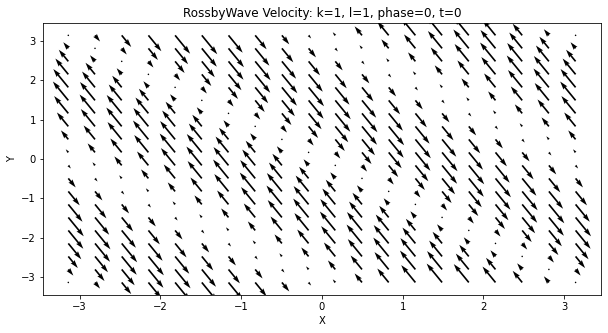

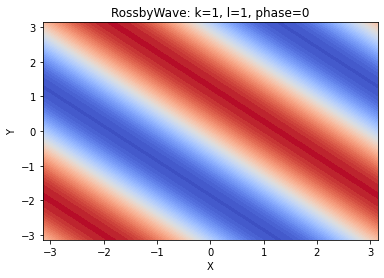

In [4]:
RossbyWave.plot_velocity(r, (-np.pi, np.pi, 20), (-np.pi, np.pi, 20))
RossbyWave.animate_streamfunction(r, tlim=(0, 1, 100))

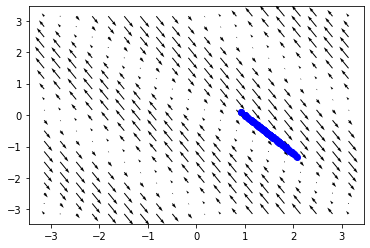

In [6]:
T = 10
x_, y_ = trajectory(r, np.array([1,0]), 0, T, 100)
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = r.velocity(X,Y,T)
fig, ax = plt.subplots()
ax.quiver(X, Y, u, v)
plt.plot(x_, y_, 'bo')

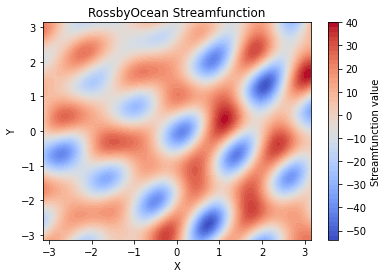

In [7]:
ro = RossbyOcean([r])
ro.add_random_waves(10)
ro.plot_streamfunction()
ro.remove_wave(0)


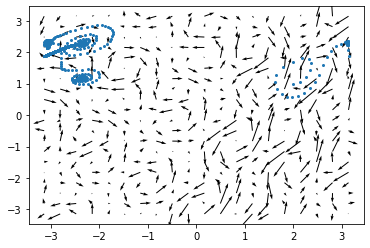

In [8]:
x_1, y_1 = trajectory(ro, np.array([2,1]), 0, 3, 1500)
#x_2, y_2 = trajectory(ro, np.array([0.5,0]), 0, 1e8, 1000)

T = 1
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = ro.velocity(X,Y,T)
fig, ax = plt.subplots()
ax.quiver(X, Y, u, v)
plt.plot(x_1, y_1, 'o', ms = 2)
#plt.plot(x_2, y_2, 'ro')

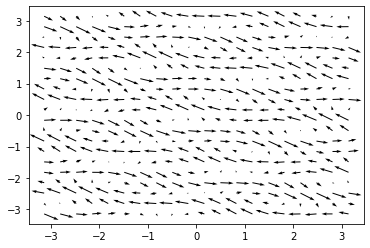

In [42]:
T = 4e12
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = ro.velocity(X,Y,T)
fig, ax = plt.subplots()
ax.quiver(X, Y, u, v)

In [39]:
t1 = ro.velocity(0,0,0)
t2 = ro.velocity(0,0,5e11)
t1, t2

(array([ 35.15822269, -15.96947563]), array([33.92162718, -7.35738731]))

In [36]:
oross = RossbyOcean([RossbyWave([1, 1])])
oross.add_grid_waves((-10, 10, 21), (-10, 10, 21))
oross.remove_wave(0)
oross.velocity(1, 1, 0)

array([-408.31037819, -351.39437108])

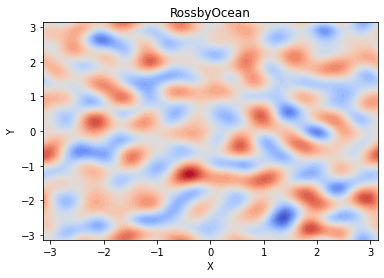

In [35]:
oross.animate_streamfunction(tlim = (0,5,100))

In [9]:
waves = [RossbyWave([10, 0]), RossbyWave([0, 10]), RossbyWave([7, 7])]
oross = RossbyOcean(waves)

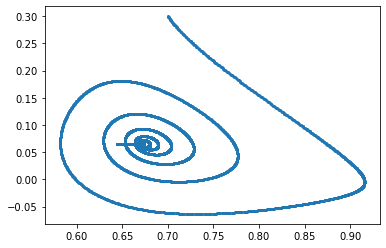

In [16]:
x_1, y_1 = trajectory(oross, np.array([0.7,0.3]), 0, 0.5, 10000)
#x_2, y_2 = trajectory(oross, np.array([0.5,0]), 0, 1e8, 1000)

T = 1
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = oross.velocity(X,Y,T)
fig, ax = plt.subplots()
#ax.quiver(X, Y, u, v)
plt.plot(x_1, y_1, 'o', ms = 2)

In [31]:
def grid_trajectory(r, t0, t, n, xlim=(-np.pi, np.pi, 6), ylim=(-np.pi, np.pi, 6)):
    grid_points = []
    final_points = []
    x, y = np.linspace(*xlim), np.linspace(*ylim)
    for i in x:
        for j in y:
            grid_points.append(np.array([i, j]))
    for x0 in grid_points:
        x_1, y_1= trajectory(r, x0, t0, t, n)
        final_points.append((x_1[-1], y_1[-1]))
    return final_points

In [34]:
a = grid_trajectory(r, 0, 1, 1000)


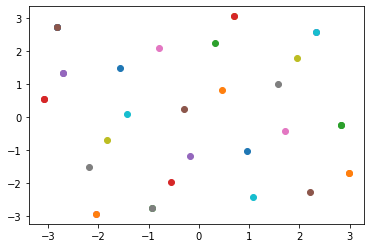

In [39]:
a
for i in a:
    plt.scatter(*i)


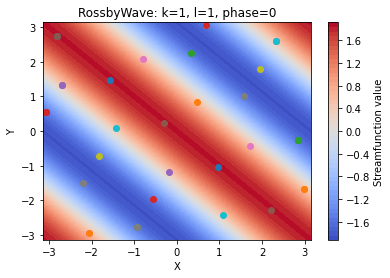

In [42]:
r.plot_streamfunction()
for i in a:
    plt.scatter(*i)

In [43]:
b = grid_trajectory(ro, 0, 1, 1000)


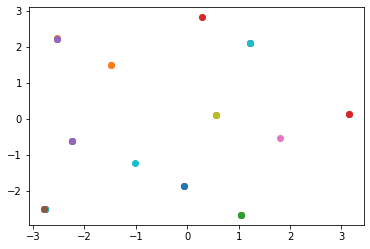

In [44]:
b
for i in b:
    plt.scatter(*i)